<a href="https://colab.research.google.com/github/gianlucamalato/machinelearning/blob/master/Find_the_best_moving_average.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
!pip install yfinance

In [50]:
import yfinance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

import datetime

In [51]:
plt.rcParams['figure.figsize'] = [10, 7]

plt.rc('font', size=14)

In [52]:
np.random.seed(0)

In [53]:
y = np.arange(0,100,1) + np.random.normal(0,10,100)

In [54]:
sma = pd.Series(y).rolling(20).mean()

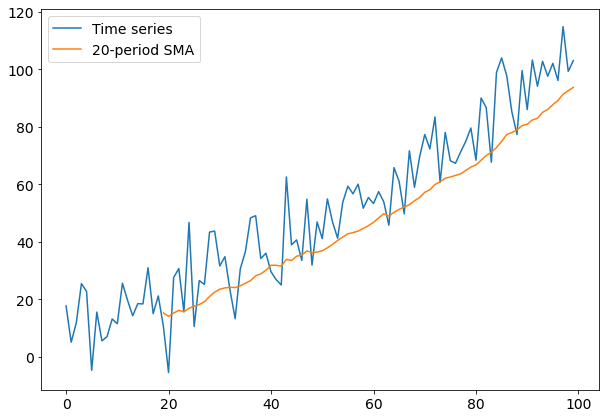

In [55]:
plt.plot(y,label="Time series")
plt.plot(sma,label="20-period SMA")

plt.legend()
plt.show()

In [56]:
n_forward = 40
name = 'GLD'
start_date = "2010-01-01"
end_date = "2020-06-15"


In [57]:
ticker = yfinance.Ticker("FB")
data = ticker.history(interval="1d",start='2010-01-01',end=end_date)


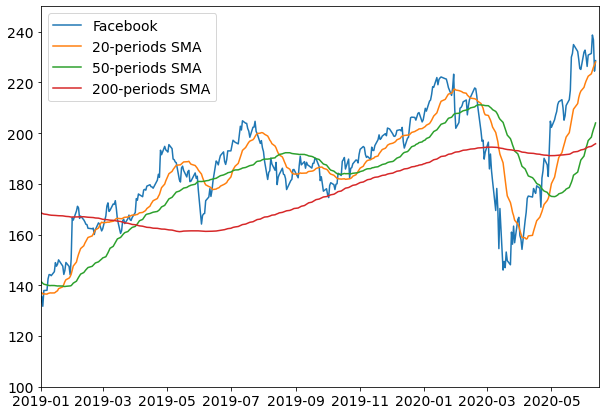

In [58]:
plt.plot(data['Close'],label='Facebook')


plt.plot(data['Close'].rolling(20).mean(),label = "20-periods SMA")
plt.plot(data['Close'].rolling(50).mean(),label = "50-periods SMA")
plt.plot(data['Close'].rolling(200).mean(),label = "200-periods SMA")

plt.legend()
plt.xlim((datetime.date(2019,1,1),datetime.date(2020,6,15)))
plt.ylim((100,250))
plt.show()

In [59]:

ticker = yfinance.Ticker(name)
data = ticker.history(interval="1d",start=start_date,end=end_date)

data['Forward Close'] = data['Close'].shift(-n_forward)

data['Forward Return'] = (data['Forward Close'] - data['Close'])/data['Close']

In [60]:
result = []
train_size = 0.6

for sma_length in range(20,500):
  
  data['SMA'] = data['Close'].rolling(sma_length).mean()
  data['input'] = [int(x) for x in data['Close'] > data['SMA']]
  
  df = data.dropna()

  training = df.head(int(train_size * df.shape[0]))
  test = df.tail(int((1 - train_size) * df.shape[0]))
  
  tr_returns = training[training['input'] == 1]['Forward Return']
  test_returns = test[test['input'] == 1]['Forward Return']

  mean_forward_return_training = tr_returns.mean()
  mean_forward_return_test = test_returns.mean()

  pvalue = ttest_ind(tr_returns,test_returns,equal_var=False)[1]
 
  result.append({
      'sma_length':sma_length,
      'training_forward_return': mean_forward_return_training,
      'test_forward_return': mean_forward_return_test,
      'p-value':pvalue
  })

In [61]:
result.sort(key = lambda x : -x['training_forward_return'])

In [62]:
result[0]

{'p-value': 0.4773670114844698,
 'sma_length': 136,
 'test_forward_return': 0.012172903018859512,
 'training_forward_return': 0.0100723311868193}

In [63]:
best_sma = result[0]['sma_length']
data['SMA'] = data['Close'].rolling(best_sma).mean()

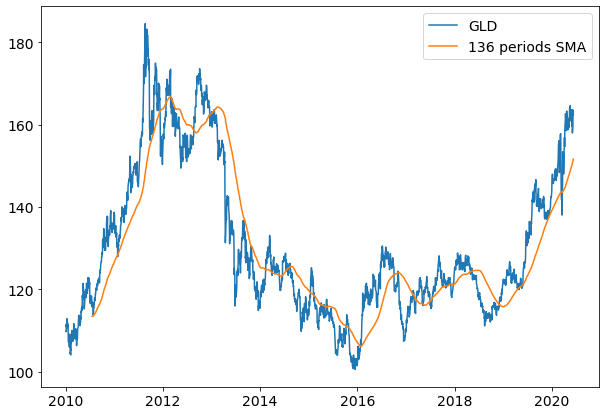

In [64]:
plt.plot(data['Close'],label=name)

plt.plot(data['SMA'],label = "{} periods SMA".format(best_sma))

plt.legend()
plt.show()